# Read Cortex Motion Analysis Corporation .trc and .forces files (example)

> [Laboratory of Biomechanics and Motor Control](http://pesquisa.ufabc.edu.br/bmclab)  
> Federal University of ABC, Brazil

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook', font_scale=1.2, rc={"lines.linewidth": 2})
from scipy import signal
import sys, os
import pyversions  # https://pypi.org/project/pyversions/
sys.path.insert(1, r'./../functions')
import io_cortexmac as io  # from https://github.com/BMClab/BMC/tree/master/functions

In [2]:
pyversions.versions();

Linux 5.4.0-29-generic 64-bit #33-Ubuntu SMP Wed Apr 29 14:32:27 UTC 2020
CPython 3.7.6 packaged by conda-forge (default, Mar 23 2020, 23:03:20) [GCC 7.3.0]
May 14 2020, 21:40:49

Module            Version
io_cortexmac        1.0.3
ipython            7.14.0
jupyterlab          2.1.2
matplotlib          3.2.1
notebook            6.0.3
numpy              1.18.4
pandas              1.0.3
pyversions          0.0.3
scipy               1.4.1
seaborn            0.10.1


## Use function `io_cortexmac.py` from BMClab's repo

In [3]:
path2 = r'/mnt/B/Dropbox/BMClab/stuff/Biomecanica/2020/'

In [4]:
fname = os.path.join(path2, 'walk_diurno.trc')
h_trc, trc = io.read_trc(fname, fname2='', units='m', dropna=False, na=0.0, df_multi=False)
trc.set_index('Time', drop=True, inplace=True)
trc.drop('Frame#', axis=1, inplace=True)

Opening file "/mnt/B/Dropbox/BMClab/stuff/Biomecanica/2020/walk_diurno.trc" ...  Units changed from "mm" to "m"
done.


In [5]:
fname = os.path.join(path2, 'walk_diurno.forces')
h_grf, grf = io.read_forces(fname, time=True, forcepla=[], mm2m=True, show_msg=True)

Opening file "/mnt/B/Dropbox/BMClab/stuff/Biomecanica/2020/walk_diurno.forces" ... done.


In [6]:
trc

,R.ASISx,R.ASISy,R.ASISz,L.ASISx,L.ASISy,L.ASISz,R.PSISx,R.PSISy,R.PSISz,L.PSISx,...,R.MT2z,L.Knee.Medialx,L.Knee.Medialy,L.Knee.Medialz,L.Ankle.Medialx,L.Ankle.Medialy,L.Ankle.Medialz,L.MT2x,L.MT2y,L.MT2z
Time,,,,,,,,,,,,,,,,,,,,,
0.000,-0.148018,1.039826,-0.479703,-0.165592,1.043436,-0.249120,-0.342912,1.070820,-0.409471,-0.349497,...,-0.412118,-0.062734,0.545297,-0.324152,-0.236939,0.148704,-0.333784,-0.150985,0.051092,-0.261883
0.007,-0.141058,1.038861,-0.479913,-0.158079,1.042954,-0.249257,-0.336116,1.070181,-0.409000,-0.342493,...,-0.412210,-0.053445,0.546187,-0.324160,-0.213441,0.143997,-0.333000,-0.123441,0.050214,-0.260259
0.013,-0.134332,1.037895,-0.479989,-0.150414,1.042240,-0.249171,-0.329322,1.069535,-0.408503,-0.335404,...,-0.412325,-0.044440,0.546737,-0.324199,-0.189872,0.139392,-0.331940,-0.095634,0.049809,-0.259605
0.020,-0.127682,1.036866,-0.480055,-0.142959,1.041588,-0.249026,-0.322433,1.068873,-0.407999,-0.328255,...,-0.412357,-0.035515,0.546795,-0.323374,-0.166322,0.134914,-0.330772,-0.068500,0.048900,-0.258710
0.027,-0.120731,1.035838,-0.479962,-0.135651,1.041068,-0.248977,-0.315505,1.068227,-0.407452,-0.321039,...,-0.412444,-0.026123,0.546789,-0.323470,-0.142575,0.130622,-0.329480,-0.041296,0.048466,-0.257679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.393,2.669729,1.013948,-0.443166,2.679452,1.018445,-0.210724,2.486804,1.050265,-0.350918,2.489218,...,-0.365184,2.759086,0.523217,-0.321459,2.908786,0.116326,-0.302856,3.050601,0.100390,-0.247426
2.400,2.678802,1.013561,-0.442502,2.689003,1.018013,-0.209994,2.496053,1.049709,-0.349817,2.498577,...,-0.365177,2.768020,0.522362,-0.321177,2.913835,0.114138,-0.303386,3.055600,0.097254,-0.248036
2.407,2.688065,1.013247,-0.441769,2.698695,1.017800,-0.209276,2.505448,1.049106,-0.348723,2.508022,...,-0.365195,2.777018,0.521624,-0.320795,2.917893,0.111588,-0.303889,3.059447,0.093263,-0.248779


In [7]:
grf

,FX1,FY1,FZ1,X1,Y1,Z1,MZ1,FX2,FY2,FZ2,...,Y6,Z6,MZ6,FX7,FY7,FZ7,X7,Y7,Z7,MZ7
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.0,0.0,0.0,2.149,0.0,0.9767,0.0,0.0,0.0,0.0,...,0.0,-0.203,-0.0,0.0,0.0,0.0,0.3,0.0,0.2,0.0
0.002222,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
0.004444,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
0.006667,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
0.008889,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.415556,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
2.417778,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0
2.420000,-0.0,-0.0,-0.0,2.149,0.0,0.9767,-0.0,-0.0,-0.0,-0.0,...,0.0,-0.203,-0.0,-0.0,-0.0,-0.0,0.3,0.0,0.2,-0.0


### trc and forces data have different sampling rates

In [8]:
freq_trc = 1/np.mean(np.diff(trc.index))
freq_trc

150.0

In [9]:
freq_grf = 1/np.mean(np.diff(grf.index))
freq_grf

450.0

#### Resample trc to the force sampling rate (150 Hz to 450 Hz)

In [10]:
# allocate variable
nrows = int(trc.shape[0]*np.round(freq_grf/freq_trc))
ncols = trc.shape[1]
data = np.nan*np.zeros((nrows, 1+ncols), dtype='float64')
# time column
data[:, 0] = np.linspace(start=0, stop=nrows/freq_grf, num=nrows, endpoint=False)
# resample data
for i in range(ncols):
     data[:, i+1] = signal.resample_poly(trc.iloc[:, i], np.round(freq_grf),
                                         np.round(freq_trc), window='blackman')
# create datafrane with new data
trc = pd.DataFrame(data=data[:, 1:], index=data[:, 0], columns=trc.columns)
trc.index.name = trc.index.name

In [11]:
trc

,R.ASISx,R.ASISy,R.ASISz,L.ASISx,L.ASISy,L.ASISz,R.PSISx,R.PSISy,R.PSISz,L.PSISx,...,R.MT2z,L.Knee.Medialx,L.Knee.Medialy,L.Knee.Medialz,L.Ankle.Medialx,L.Ankle.Medialy,L.Ankle.Medialz,L.MT2x,L.MT2y,L.MT2z
0.000000,-0.148013,1.039790,-0.479687,-0.165587,1.043400,-0.249111,-0.342900,1.070784,-0.409457,-0.349485,...,-0.412104,-0.062732,0.545279,-0.324140,-0.236931,0.148699,-0.333772,-0.150980,0.051090,-0.261874
0.002222,-0.165754,1.176067,-0.542727,-0.185522,1.180283,-0.281859,-0.386272,1.211210,-0.463102,-0.393678,...,-0.466229,-0.068713,0.617092,-0.366665,-0.262359,0.167078,-0.377417,-0.164174,0.057534,-0.295793
0.004444,-0.158350,1.141277,-0.526916,-0.177347,1.145552,-0.273660,-0.372476,1.175510,-0.449371,-0.379591,...,-0.452610,-0.063299,0.599354,-0.355922,-0.246086,0.160462,-0.366086,-0.149304,0.055510,-0.286510
0.006667,-0.141053,1.038825,-0.479896,-0.158074,1.042918,-0.249249,-0.336105,1.070144,-0.408986,-0.342482,...,-0.412196,-0.053444,0.546169,-0.324149,-0.213434,0.143992,-0.332988,-0.123436,0.050212,-0.260250
0.008889,-0.129460,0.974991,-0.450652,-0.145114,0.978988,-0.234049,-0.312638,1.004536,-0.383805,-0.318513,...,-0.387078,-0.046193,0.513157,-0.304436,-0.190172,0.133177,-0.312260,-0.103831,0.046922,-0.243902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2.415556,2.966845,1.112183,-0.483880,2.979224,1.117381,-0.228523,2.766774,1.151119,-0.381335,2.769873,...,-0.401145,3.064043,0.571839,-0.351553,3.208781,0.117855,-0.334532,3.363905,0.095137,-0.275038
2.417778,3.059988,1.145627,-0.498158,3.072851,1.151074,-0.235108,2.853934,1.185643,-0.392496,2.857043,...,-0.413277,3.159964,0.588913,-0.361939,3.306487,0.120246,-0.344823,3.466175,0.096371,-0.283475
2.420000,2.706955,1.012618,-0.440161,2.718380,1.017494,-0.207651,2.524833,1.047936,-0.346756,2.527507,...,-0.365331,2.795234,0.520475,-0.319804,2.923279,0.105623,-0.304910,3.064357,0.084280,-0.250606
2.422222,1.874230,0.700753,-0.304532,1.882157,0.704158,-0.143631,1.748197,0.725172,-0.239891,1.750007,...,-0.252832,1.935280,0.360155,-0.221260,2.023259,0.072808,-0.211053,2.120854,0.057945,-0.173424


## Plot of some data

In [12]:
trc.columns

Index(['R.ASISx', 'R.ASISy', 'R.ASISz', 'L.ASISx', 'L.ASISy', 'L.ASISz',
       'R.PSISx', 'R.PSISy', 'R.PSISz', 'L.PSISx', 'L.PSISy', 'L.PSISz',
       'L.Iliac.Crestx', 'L.Iliac.Cresty', 'L.Iliac.Crestz', 'R.Iliac.Crestx',
       'R.Iliac.Cresty', 'R.Iliac.Crestz', 'R.GTRx', 'R.GTRy', 'R.GTRz',
       'R.Kneex', 'R.Kneey', 'R.Kneez', 'R.HFx', 'R.HFy', 'R.HFz', 'R.TTx',
       'R.TTy', 'R.TTz', 'R.Anklex', 'R.Ankley', 'R.Anklez', 'R.Heelx',
       'R.Heely', 'R.Heelz', 'R.MT1x', 'R.MT1y', 'R.MT1z', 'R.MT5x', 'R.MT5y',
       'R.MT5z', 'L.GTRx', 'L.GTRy', 'L.GTRz', 'L.Kneex', 'L.Kneey', 'L.Kneez',
       'L.HFx', 'L.HFy', 'L.HFz', 'L.TTx', 'L.TTy', 'L.TTz', 'L.Anklex',
       'L.Ankley', 'L.Anklez', 'L.Heelx', 'L.Heely', 'L.Heelz', 'L.MT1x',
       'L.MT1y', 'L.MT1z', 'L.MT5x', 'L.MT5y', 'L.MT5z', 'R.Knee.Medialx',
       'R.Knee.Medialy', 'R.Knee.Medialz', 'R.Ankle.Medialx',
       'R.Ankle.Medialy', 'R.Ankle.Medialz', 'R.MT2x', 'R.MT2y', 'R.MT2z',
       'L.Knee.Medialx', 'L.Knee.Med

In [13]:
grf.columns

Index(['FX1', 'FY1', 'FZ1', 'X1', 'Y1', 'Z1', 'MZ1', 'FX2', 'FY2', 'FZ2', 'X2',
       'Y2', 'Z2', 'MZ2', 'FX3', 'FY3', 'FZ3', 'X3', 'Y3', 'Z3', 'MZ3', 'FX4',
       'FY4', 'FZ4', 'X4', 'Y4', 'Z4', 'MZ4', 'FX5', 'FY5', 'FZ5', 'X5', 'Y5',
       'Z5', 'MZ5', 'FX6', 'FY6', 'FZ6', 'X6', 'Y6', 'Z6', 'MZ6', 'FX7', 'FY7',
       'FZ7', 'X7', 'Y7', 'Z7', 'MZ7'],
      dtype='object')

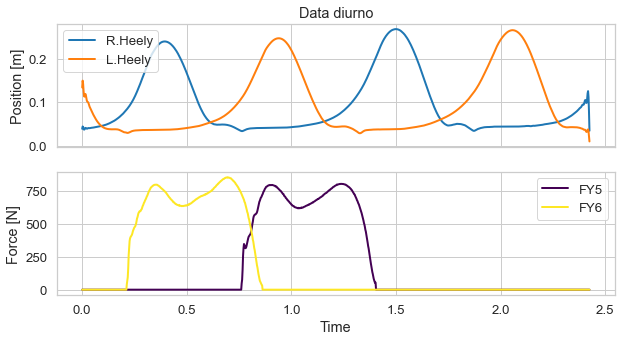

In [14]:
fig, axs = plt.subplots(2, 1, sharex = True, squeeze=True, figsize=(10, 5))
trc.plot(y=['R.Heely', 'L.Heely'], ax=axs[0], title='Data diurno')
grf.plot(y=['FY5', 'FY6'], ax=axs[1], colormap='viridis')
axs[0].set_ylabel('Position [m]')
axs[1].set_ylabel('Force [N]')
plt.show()

This means that the subject stepped on force plate **#6** with her/his **left** foot and then stepped on force plate **#5** with her/his **right** foot.

## For data noturno

Opening file "/mnt/B/Dropbox/BMClab/stuff/Biomecanica/2020/walk_noturno.trc" ...  Number of markers changed from 28 to 55.
 Units changed from "mm" to "m"
done.
Opening file "/mnt/B/Dropbox/BMClab/stuff/Biomecanica/2020/walk_noturno.forces" ... done.


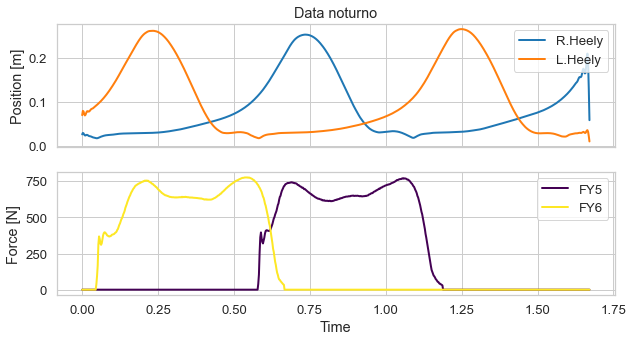

In [15]:
fname = os.path.join(path2, 'walk_noturno.trc')
h_trc, trc = io.read_trc(fname, fname2='', units='m', dropna=False, na=0.0, df_multi=False)
trc.set_index('Time', drop=True, inplace=True)
trc.drop('Frame#', axis=1, inplace=True)
fname = os.path.join(path2, 'walk_noturno.forces')
h_grf, grf = io.read_forces(fname, time=True, forcepla=[], mm2m=True, show_msg=True)

freq_trc = 1/np.mean(np.diff(trc.index))
freq_grf = 1/np.mean(np.diff(grf.index))

# allocate variable
nrows = int(trc.shape[0]*np.round(freq_grf/freq_trc))
ncols = trc.shape[1]
data = np.nan*np.zeros((nrows, 1+ncols), dtype='float64')
# time column
data[:, 0] = np.linspace(start=0, stop=nrows/freq_grf, num=nrows, endpoint=False)
# resample data
for i in range(ncols):
     data[:, i+1] = signal.resample_poly(trc.iloc[:, i], np.round(freq_grf),
                                         np.round(freq_trc), window='blackman')
# create datafrane with new data
trc = pd.DataFrame(data=data[:, 1:], index=data[:, 0], columns=trc.columns)
trc.index.name = trc.index.name

fig, axs = plt.subplots(2, 1, sharex = True, squeeze=True, figsize=(10, 5))
trc.plot(y=['R.Heely', 'L.Heely'], ax=axs[0], title='Data noturno')
grf.plot(y=['FY5', 'FY6'], ax=axs[1], colormap='viridis')
axs[0].set_ylabel('Position [m]')
axs[1].set_ylabel('Force [N]')
plt.show()

This means that the subject stepped on force plate **#6** with her/his **right** foot and then stepped on force plate **#5** with her/his **left** foot.